# 1. introduction to svm

Support Vector Machines (SVM) is a powerful algorithm used for classification tasks. It works by finding the best line (or hyperplane) that separates different classes in a dataset, maximizing the margin between them. SVM is effective in high-dimensional spaces and is widely used in various fields like image classification and bioinformatics.











Support Vector Machines (SVM) with kernels are a variant of SVM that can handle non-linearly separable data. Kernels allow SVM to transform the input data into a higher-dimensional space where it becomes linearly separable, enabling SVM to find more complex decision boundaries. This technique is particularly useful in scenarios where simple linear separation is not sufficient, such as in image recognition or text classification tasks.






# 2. Neccesary import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3. about the cancer data

in this example we are using a dataset that has a 10 participants (coloumn) in each record, 700 records (rows)

### row = record
### column = attribute / dimension 
### target = prediction

# 3. load data from csv file

This dataset is often used in machine learning and medical research for predicting the likelihood of breast cancer based on these cell features. Each column provides valuable information about the characteristics of cell nuclei, which can be analyzed to make predictions about the nature of the cells.whether a cell is malignant or benign based on its features.







In [2]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.head()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
cell_df.shape

(699, 11)

In [4]:
cell_df.size

7689

In [5]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

malignant and benign denoted as 2 and 4 respectively

In [6]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

# 5. Distribution of the classes 

This code creates two DataFrames, benign_df and malignant_df, by filtering the original DataFrame cell_df based on the values in the 'Class' column.


In [7]:
benign_df = cell_df[cell_df ['Class']==2][0:200]
malignant_df = cell_df[cell_df ['Class']==4][0:200]

This code will create a scatter plot using the DataFrame benign_df, specifically plotting the relationship between the 'Clump' column on the x-axis and the 'UnifSize' column on the y-axis. 

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

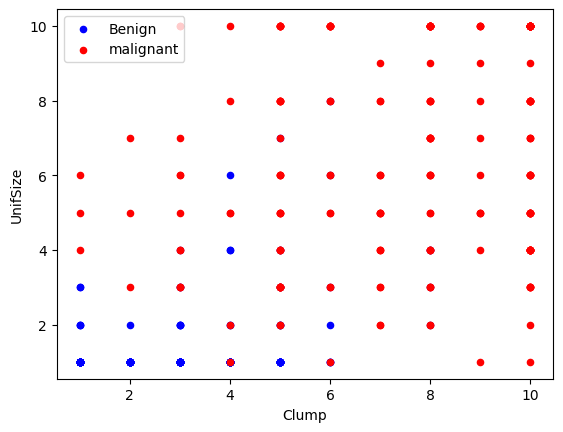

In [8]:
axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='malignant', ax = axes)


# 6. identifying unwanded rows

In [9]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [10]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors= 'coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

In [11]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# 7. Remove unwanded columns 

In [12]:
cell_df.columns


Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [13]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
# cell_df 100 rows and 11 columns,
# picked 9 columns out of 11

# independent variables
x = np.asarray (feature_df)

# dependent variable
y = np.asarray (cell_df['Class'])

x [0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [14]:
y [0:5]

array([2, 2, 2, 2, 2], dtype=int64)

# 8. Divide the data as Train/Test dataset

In [15]:
'''
cell_df --> Train / Test
Train(x,y) ## x itself  is a 2D array. ## y is 1D 
Test(x,y)
'''
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 4)
x_train.shape
#(546, 9)

y_train.shape
#(546,)

x_test.shape
#(137, 9)

y_test.shape
#(137,)



(137,)

In [16]:
from sklearn import svm

classifier = svm_classifier = svm.SVC(kernel='linear', C=2)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

# 10. Evaluation(Result)

In [17]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



Precision is the ratio of correctly predicted positive observations to the total predicted positives.


Recall is the ratio of correctly predicted positive observations to the all observations in actual class.

The F1-score is the weighted average of Precision and Recall. It is a harmonic mean of precision and recall.

Support is the number of actual occurrences of the class in the specified dataset.

Accuracy is the ratio of correctly predicted observations to the total observations.

Macro average calculates the mean of the precision, recall, and F1-score for all classes, without considering class imbalance.

Weighted average calculates the weighted mean of the precision, recall, and F1-score for all classes, considering class imbalance.







## This code represents the actual and predicted data

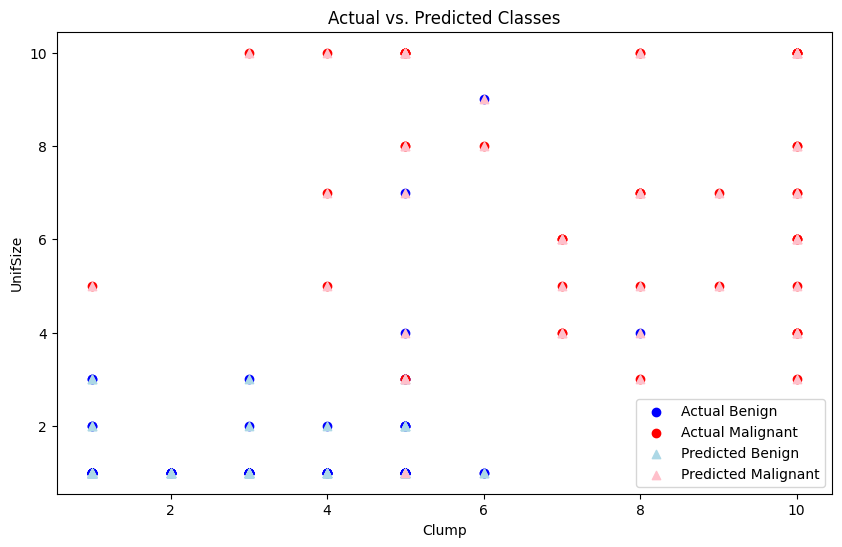

In [18]:
# Plot actual vs. predicted classes
plt.figure(figsize=(10, 6))

# Plot benign data points
plt.scatter(x_test[y_test == 2][:, 0], x_test[y_test == 2][:, 1], color='blue', label='Actual Benign')

# Plot malignant data points
plt.scatter(x_test[y_test == 4][:, 0], x_test[y_test == 4][:, 1], color='red', label='Actual Malignant')

# Plot predicted data points
plt.scatter(x_test[y_predict == 2][:, 0], x_test[y_predict == 2][:, 1], color='lightblue', marker='^', label='Predicted Benign')
plt.scatter(x_test[y_predict == 4][:, 0], x_test[y_predict == 4][:, 1], color='pink', marker='^', label='Predicted Malignant')

plt.xlabel('Clump')
plt.ylabel('UnifSize')
plt.title('Actual vs. Predicted Classes')
plt.legend()
plt.show()


This code creates a side-by-side comparison of the actual classes and the classes predicted by the machine learning model. 

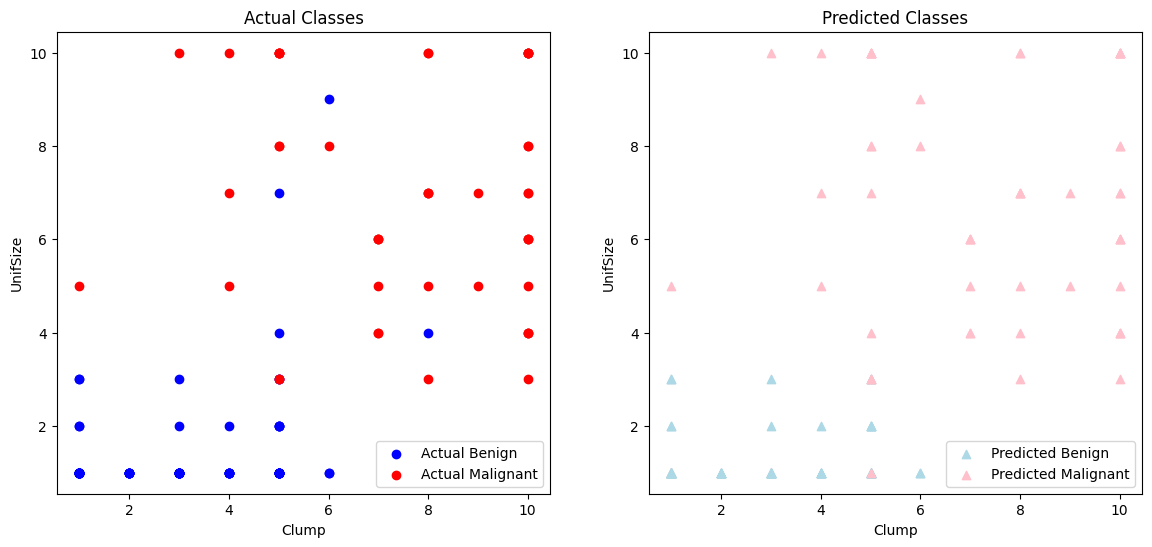

In [19]:
# Plot actual vs. predicted classes side by side
plt.figure(figsize=(14, 6))

# Plot actual benign data points
plt.subplot(1, 2, 1)
plt.scatter(x_test[y_test == 2][:, 0], x_test[y_test == 2][:, 1], color='blue', label='Actual Benign')
plt.scatter(x_test[y_test == 4][:, 0], x_test[y_test == 4][:, 1], color='red', label='Actual Malignant')
plt.xlabel('Clump')
plt.ylabel('UnifSize')
plt.title('Actual Classes')
plt.legend()

# Plot predicted benign and malignant data points
plt.subplot(1, 2, 2)
plt.scatter(x_test[y_predict == 2][:, 0], x_test[y_predict == 2][:, 1], color='lightblue', marker='^', label='Predicted Benign')
plt.scatter(x_test[y_predict == 4][:, 0], x_test[y_predict == 4][:, 1], color='pink', marker='^', label='Predicted Malignant')
plt.xlabel('Clump')
plt.ylabel('UnifSize')
plt.title('Predicted Classes')
plt.legend()

plt.show()
